# Voorbeeld 1:

Voor het eerste voorbeeld gaan we data gebruiken uit het artikel: _Comparative Study of Tumor Growth Based on Single Species Models_ gepubliceerd door S.S. Hassan & H.M. Al-Saedi, 
2024 ("Comparative Study of Tumor Growth Based on Single Species Models", 
BIO Web of Conferences 97, 00118)

Hiervoor gaan we de echte data uit dit onderzoek gebruiken en kijken of één of meerdere van onze modellen hier een goeie fit op kan toepassen. Om te beginnen gaan we voor elk model de AIC-waarde berekenen om te kijken welke het meest geschikt is.

In [1]:
# De exacte data inladen:
import pandas as pd
from ode_solver import *

ts_exact = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs_exact = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({"$t$": ts_exact, "$V$": Vs_exact}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0,13,20,32,42,55,65,75,85,88,95,98,107,115,120
$V$,250,255,550,575,576,800,1050,1250,1750,2000,2550,2750,3000,3500,4000


In [15]:
# Voor elk model de AIC-waarde berekenen:
aantal_datapunten = len(Vs_exact)
Vs_scaled = [v / 100 for v in Vs_exact]

solver = ode_solver(Vs_scaled[0], 120, 1)
params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, min_volume, max_volume: solver.allee(c, min_volume, max_volume),
    params0 = params0
)
allee_aic = solver.aic(mse, aantal_datapunten, len(params))
alle_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)
exponentieel_afvlakkend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_afvlakkend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)
exponentieel_toenemend_aic = solver.aic(mse, aantal_datapunten, len(params))
exponentieel_toenemend_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, volume_max: solver.gompertz(c, volume_max),
    params0 = params0
)
gompertz_aic = solver.aic(mse, aantal_datapunten, len(params))
gompertz_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.lineair(c),
    params0 = params0
)
lineair_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.lineair_gelimiteerd(c, d),
    params0 = params0
)
lineair_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
lineair_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.logistisch(c, max_volume),
    params0 = params0
)
logistisch_aic = solver.aic(mse, aantal_datapunten, len(params))
logistisch_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.mendelsohn(c, d),
    params0 = params0
)
mendelsohn_aic = solver.aic(mse, aantal_datapunten, len(params))
mendelsohn_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d, max_volume: solver.montroll(c, d, max_volume),
    params0 = params0
)
montroll_aic = solver.aic(mse, aantal_datapunten, len(params))
montroll_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)
oppervlakte_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
oppervlakte_gelimiteerd_bic = solver.bic(mse, aantal_datapunten, len(params))


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.von_bertalanffy(c, d),
    params0 = params0
)
von_bertalanffy_aic = solver.aic(mse, aantal_datapunten, len(params))
von_bertalanffy_bic = solver.bic(mse, aantal_datapunten, len(params))


print("AIC-waarde per model:")
print(f"Allee: {round(allee_aic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_aic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_aic, 3)}")
print(f"Gompertz: {round(gompertz_aic, 3)}")
print(f"Lineair: {round(lineair_aic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_aic, 3)}")
print(f"Logistisch: {round(logistisch_aic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_aic, 3)}")
print(f"Montroll: {round(montroll_aic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_aic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_aic, 3)}\n")


print("BIC-waarde per model:")
print(f"Allee: {round(alle_bic, 3)}")
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_bic, 3)}")
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_bic, 3)}")
print(f"Gompertz: {round(gompertz_bic, 3)}")
print(f"Lineair: {round(lineair_bic, 3)}")
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_bic, 3)}")
print(f"Logistisch: {round(logistisch_bic, 3)}")
print(f"Mendelsohn: {round(mendelsohn_bic, 3)}")
print(f"Montroll: {round(montroll_bic, 3)}")
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_bic, 3)}")
print(f"Von Bertalanffy: {round(von_bertalanffy_bic, 3)}")

AIC-waarde per model:
Allee: 198.804
Exponentieel afvlakkend: 165.5
Exponentieel toenemend: 181.602
Gompertz: 150.511
Lineair: 189.54
Lineair gelimiteerd: 183.242
Logistisch: 196.755
Mendelsohn: 125.646
Montroll: 213.752
Oppervlakte gelimiteerd: 154.088
Von Bertalanffy: 128.901

BIC-waarde per model:
Allee: 200.928
Exponentieel afvlakkend: 166.916
Exponentieel toenemend: 182.31
Gompertz: 151.927
Lineair: 190.248
Lineair gelimiteerd: 184.658
Logistisch: 198.172
Mendelsohn: 127.062
Montroll: 215.877
Oppervlakte gelimiteerd: 155.504
Von Bertalanffy: 130.317


De top 3 laagste AIC-waarden zijn:
1. Mendelsohn (~124.034)
2. Von Bertalanffy (~128.901)
3. Oppervlakte gelimiteerd (~148.197)

De top 3 laagste BIC-waarden zijn:
1. Mendelsohn (~125.45)
2. Von Bertalanffy (~130.317)
3. Oppervlakte gelimiteerd (~149.614)

 Dit betekent dat het Lineaire gelimiteerde model het meest geschikte model is voor deze dataset. De volgende stap is om dit model samen met de data te plotten.

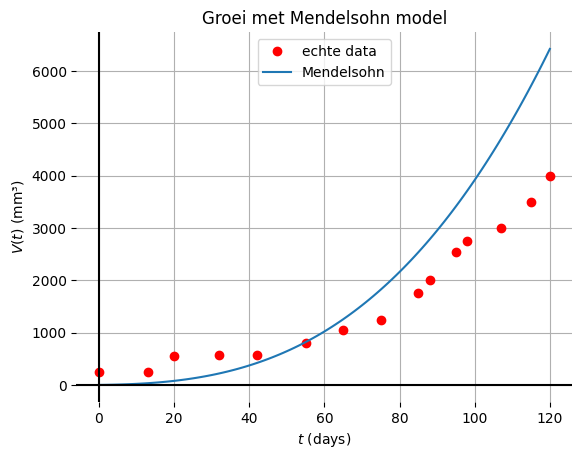

In [14]:
model = ode_solver(250, 120, 1)
params0 = {"c" : 0.0, "d" : 0}
params, mse = model.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: model.mendelsohn(c, d),
    params0 = params0
)

dagen, volumes = model.mendelsohn(**params)
volumes_scaled = [v / 100 for v in volumes]

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
plt.plot(dagen, volumes_scaled, label = "Mendelsohn")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Mendelsohn model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

In deze figuur is te zien dat het model een redelijke lijn door de data kan maken. De laatste meting van de data is gedaan op dag 120, dit model zou gebruikt kunnen worden om te voorspellen hoe groet de tumor gaat zijn na bijvoorbeeld 150 dagen. In een plot zou dat er als volgt uit zien:

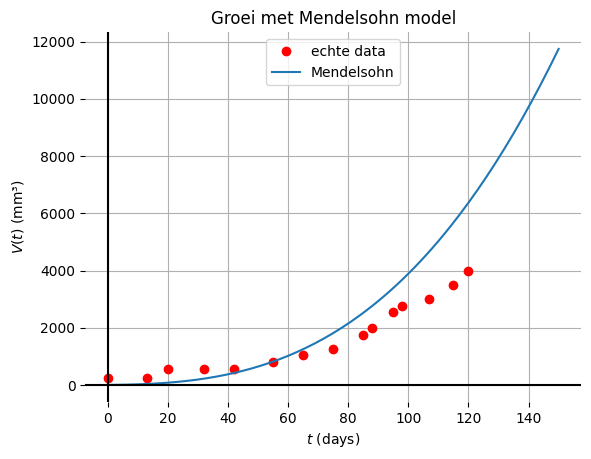

In [13]:
model = ode_solver(250, 150, 1)
params0 = {"c" : 0.0, "d" : 0}
params, mse = model.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: model.mendelsohn(c, d),
    params0 = params0
)

dagen, volumes = model.mendelsohn(**params)
volumes_scaled = [v / 100 for v in volumes]

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
plt.plot(dagen, volumes_scaled, label = "Mendelsohn")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Mendelsohn model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Zoals is te zien in de figuur gaat het model nu voorbij de gegeven data. Richting het eind schiet deze wel erg snel omhoog, als er meer meetpunten geweest zouden zijn in de data zou er een betere fitting van het model gemaakt kunnen worden. Maar ook met dit model is dit nog een redelijke voorspelling van de groei.